In [43]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10

In [6]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.1


In [7]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
# Display a few sample images
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

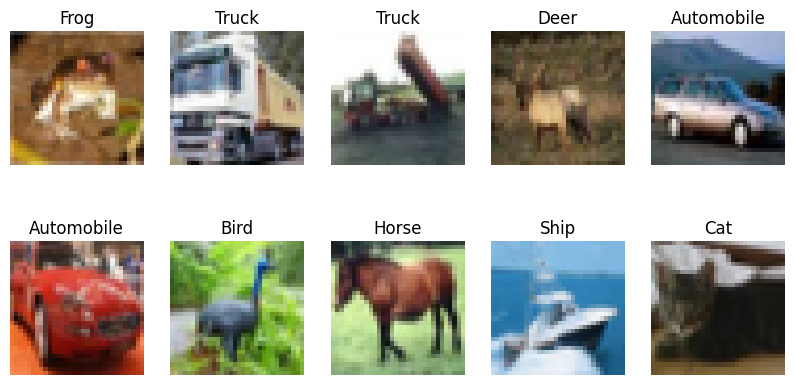

In [21]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i].argmax()])
    plt.axis('off')
    # Save the figure to a file
plt.savefig('sample_images.png', dpi=300, bbox_inches='tight')  # Save the figure
plt.show()

In [20]:
# Define the CNN model
model = Sequential([
    Input(shape=(32, 32, 3)),  # Specify the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - accuracy: 0.3008 - loss: 1.8759 - val_accuracy: 0.5371 - val_loss: 1.2971
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.5143 - loss: 1.3528 - val_accuracy: 0.6093 - val_loss: 1.1054
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.5833 - loss: 1.1740 - val_accuracy: 0.6501 - val_loss: 0.9848
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.6368 - loss: 1.0446 - val_accuracy: 0.6650 - val_loss: 0.9425
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.6656 - loss: 0.9568 - val_accuracy: 0.6949 - val_loss: 0.8714
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.6912 - loss: 0.8845 - val_accuracy: 0.7154 - val_loss: 0.8350
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.7159 - loss: 0.8208 - val_accuracy: 0.7219 - val_loss: 0.8200
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.7328 - loss: 0.77

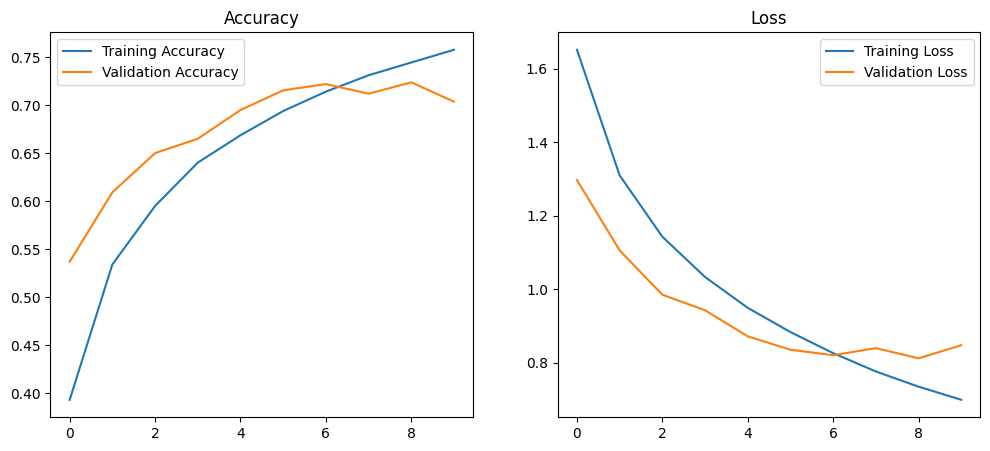

In [23]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Save the figure to a file
plt.savefig('training_validation_plots.png', dpi=300, bbox_inches='tight')  # Save the figure

plt.show()

In [29]:
print(model.input_shape)
# Force the model to initialize by passing a dummy input
test_image = np.expand_dims(x_test[0], axis=0)  # Add batch dimension to match input shape
_ = model.predict(test_image)  # Call the model to set up input and output shapes


(None, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


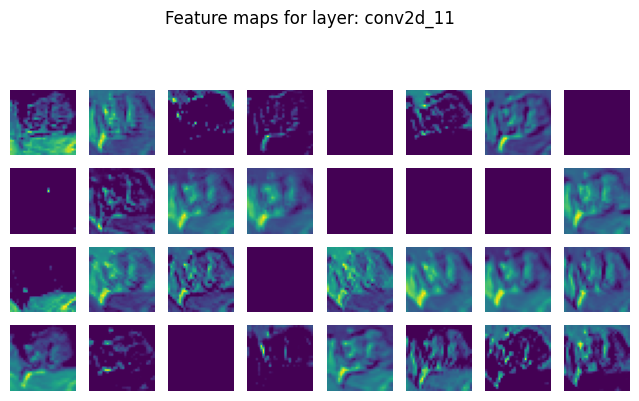

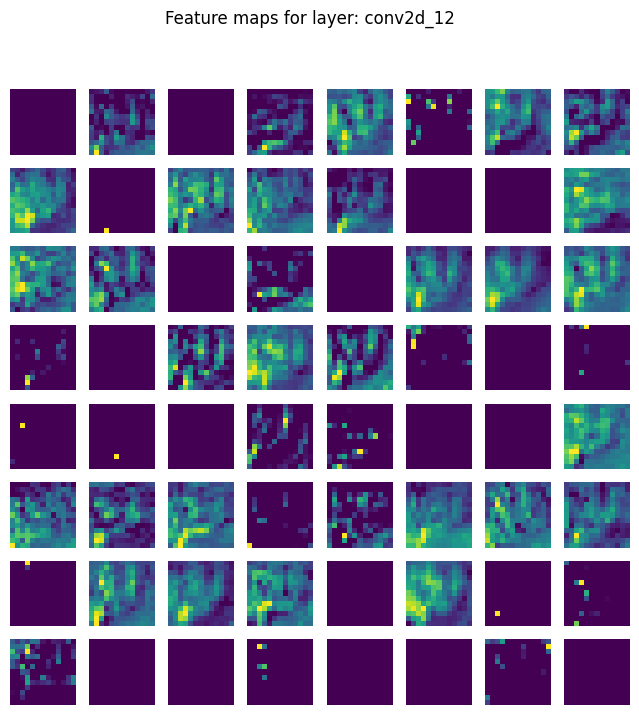

In [49]:
# Step 1: Force model initialization
test_image = np.expand_dims(x_test[0], axis=0)  # Add batch size dimension
_ = model.predict(test_image)  # Initialize the model by making a prediction

# Step 2: Create a sub-model to output intermediate activations
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Step 3: Get activations
activations = activation_model.predict(test_image)

# Step 4: Visualize feature maps
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

for layer_name, activation in zip(layer_names, activations):
    n_features = activation.shape[-1]  # Number of features in the feature map
    size = activation.shape[1]         # Feature map size (e.g., 30x30, 15x15)

    plt.figure(figsize=(8, 8))
    plt.suptitle(f"Feature maps for layer: {layer_name}")
    for i in range(min(n_features, 64)):  # Display up to 64 feature maps
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


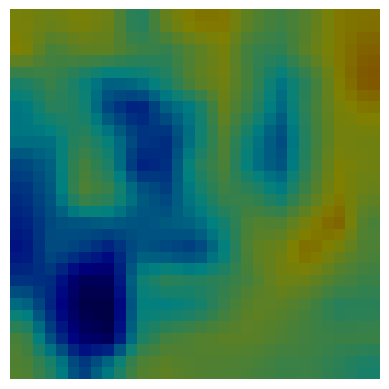

In [56]:
# Grad-CAM function
def grad_cam(model, img_array, class_index, layer_name):
    # Create a model that maps the input image to the activations of the specified layer and the output
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    # Compute the gradient of the target class score w.r.t. feature map activations
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)  # Gradients of the target class
    pooled_grads = K.mean(grads, axis=(0, 1, 2))  # Global average pooling of gradients

    # Convert tensors to numpy arrays
    conv_outputs = conv_outputs[0].numpy()
    pooled_grads = pooled_grads.numpy()

    # Multiply each channel by its respective gradient importance
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Compute the heatmap
    heatmap = np.mean(conv_outputs, axis=-1)  # Average along the channels
    heatmap = np.maximum(heatmap, 0)  # ReLU to remove negative values
    heatmap /= np.max(heatmap)  # Normalize to [0, 1]
    return heatmap

# Function to visualize Grad-CAM heatmap superimposed on the image
def display_grad_cam(img_array, heatmap, return_image=False):
    import cv2

    # Rescale heatmap to 0-255
    heatmap = np.uint8(255 * heatmap)

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))

    # Convert to RGB for overlay
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on the original image
    overlay_img = cv2.addWeighted(heatmap, 0.5, img_array[0].astype(np.uint8), 0.5, 0)

    if return_image:
        return overlay_img  # Return the combined image
    else:
        plt.imshow(overlay_img)
        plt.axis('off')
        plt.show()


# Select a test image
test_img = np.expand_dims(x_test[0], axis=0)  # Add batch dimension

# Get the predicted class
predicted_class = np.argmax(model.predict(test_img))

# Name of the last convolutional layer in the model
last_conv_layer_name = 'conv2d_12'  # Replace with the actual name of your last Conv2D layer

# Compute the Grad-CAM heatmap
heatmap = grad_cam(model, test_img, predicted_class, last_conv_layer_name)

# Visualize the Grad-CAM result
display_grad_cam(test_img, heatmap)


**Grad-CAM for Multiple Test Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image 1:
True Label: 3, Predicted Label: 8


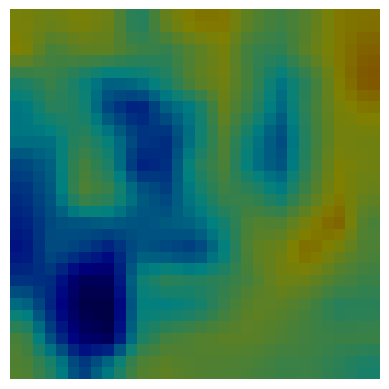

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image 2:
True Label: 8, Predicted Label: 8


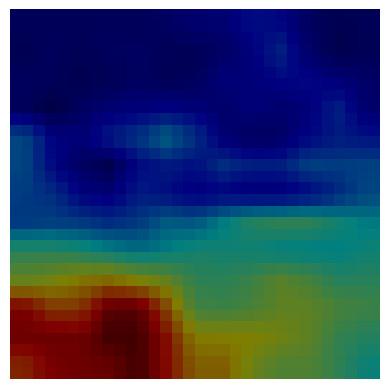

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image 3:
True Label: 8, Predicted Label: 8


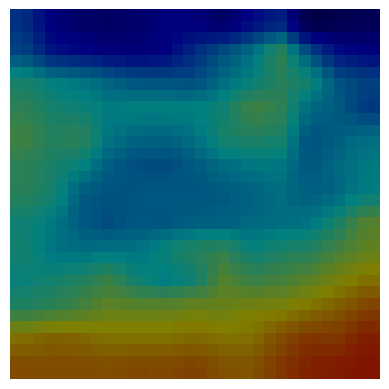

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image 4:
True Label: 0, Predicted Label: 8


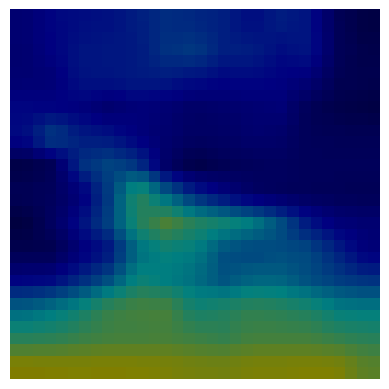

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 5:
True Label: 6, Predicted Label: 8


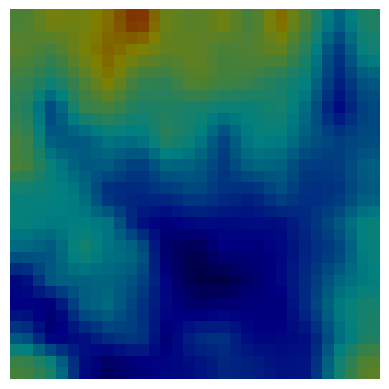

In [57]:
def visualize_grad_cam_multiple(model, x_test, y_test, layer_name, num_images=5):
    for idx in range(num_images):
        # Select a test image
        test_img = np.expand_dims(x_test[idx], axis=0)  # Add batch dimension
        true_label = np.argmax(y_test[idx])  # True class label
        predicted_class = np.argmax(model.predict(test_img))  # Predicted class label

        # Compute Grad-CAM heatmap
        heatmap = grad_cam(model, test_img, predicted_class, layer_name)

        # Display Grad-CAM visualization
        print(f"Image {idx + 1}:")
        print(f"True Label: {true_label}, Predicted Label: {predicted_class}")
        display_grad_cam(test_img, heatmap)

# Run Grad-CAM for the first 5 test images
visualize_grad_cam_multiple(model, x_test, y_test, last_conv_layer_name, num_images=5)


**Step 2: Separate Correct and Incorrect Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Incorrect Prediction 1:
True Label: 3, Predicted Label: 8


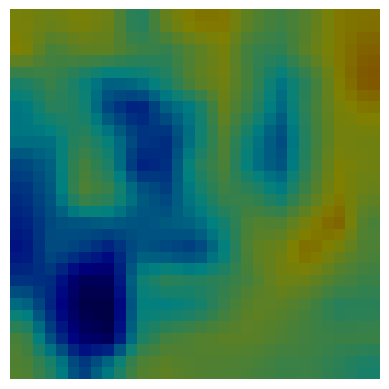

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Correct Prediction 1:
True Label: 8, Predicted Label: 8


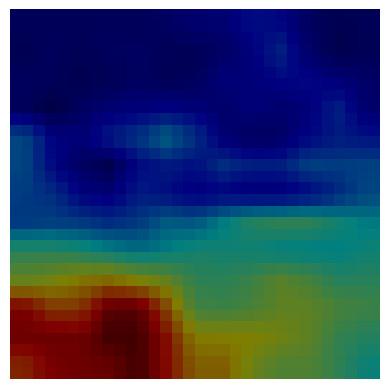

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Correct Prediction 2:
True Label: 8, Predicted Label: 8


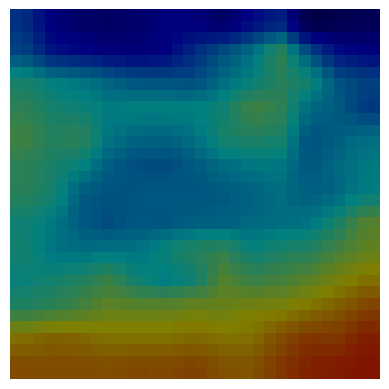

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Incorrect Prediction 2:
True Label: 0, Predicted Label: 8


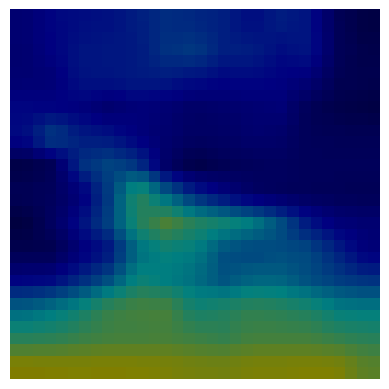

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Incorrect Prediction 3:
True Label: 6, Predicted Label: 8


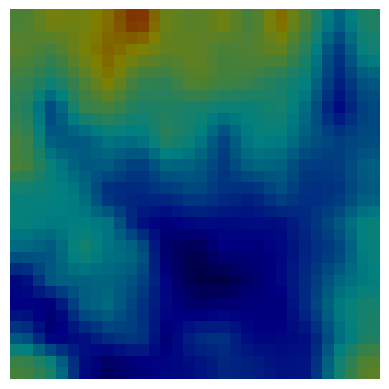

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Correct Prediction 3:
True Label: 9, Predicted Label: 9


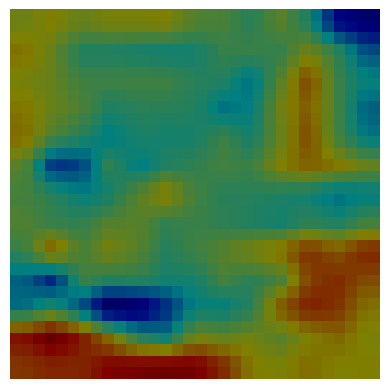

In [58]:
def grad_cam_correct_vs_incorrect(model, x_test, y_test, layer_name, num_images=3):
    correct_count, incorrect_count = 0, 0
    idx = 0

    while correct_count < num_images or incorrect_count < num_images:
        # Select a test image
        test_img = np.expand_dims(x_test[idx], axis=0)  # Add batch dimension
        true_label = np.argmax(y_test[idx])  # True class label
        predicted_class = np.argmax(model.predict(test_img))  # Predicted class label

        # Compute Grad-CAM heatmap
        heatmap = grad_cam(model, test_img, predicted_class, layer_name)

        # Check if the prediction is correct
        if predicted_class == true_label and correct_count < num_images:
            print(f"Correct Prediction {correct_count + 1}:")
            print(f"True Label: {true_label}, Predicted Label: {predicted_class}")
            display_grad_cam(test_img, heatmap)
            correct_count += 1

        elif predicted_class != true_label and incorrect_count < num_images:
            print(f"Incorrect Prediction {incorrect_count + 1}:")
            print(f"True Label: {true_label}, Predicted Label: {predicted_class}")
            display_grad_cam(test_img, heatmap)
            incorrect_count += 1

        # Move to the next test image
        idx += 1

# Visualize Grad-CAM for correct and incorrect predictions
grad_cam_correct_vs_incorrect(model, x_test, y_test, last_conv_layer_name, num_images=3)


**Add Class Activation Map (CAM) Analysis for Multiple Classes**

<ipython-input-56-9a6c15bdfa95>:28: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)  # Normalize to [0, 1]
<ipython-input-56-9a6c15bdfa95>:39: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


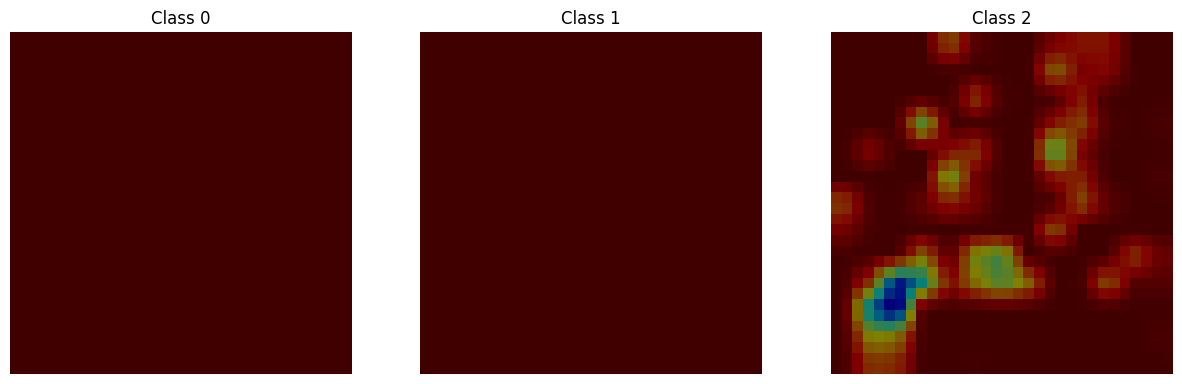

In [63]:
import matplotlib.pyplot as plt

def grad_cam_multiple_classes(model, img_array, layer_name, class_indices):
    """
    Compute and display Grad-CAM visualizations for multiple classes in a single row.
    """
    plt.figure(figsize=(15, 5))  # Adjust figure size for better visibility

    for i, class_index in enumerate(class_indices):
        # Compute Grad-CAM heatmap for the specified class
        heatmap = grad_cam(model, img_array, class_index, layer_name)

        # Create Grad-CAM visualization
        combined_image = display_grad_cam(img_array, heatmap, return_image=True)  # Ensure the function supports returning the image

        # Plot the visualization in a single row
        plt.subplot(1, len(class_indices), i + 1)
        plt.imshow(combined_image)
        plt.title(f"Class {class_index}")
        plt.axis('off')

    # Save the figure as a single-row image
    plt.savefig('grad_cam_multiple_classes.png', dpi=300, bbox_inches='tight')  # Save the image
    plt.show()

# Example: Visualize Grad-CAM for 3 different classes (e.g., 0, 1, 2)
test_img = np.expand_dims(x_test[0], axis=0)  # Add batch dimension
class_indices = [0, 1, 2]  # Replace with class indices relevant to your dataset
grad_cam_multiple_classes(model, test_img, last_conv_layer_name, class_indices)


**Visualize Confusion Matrix**

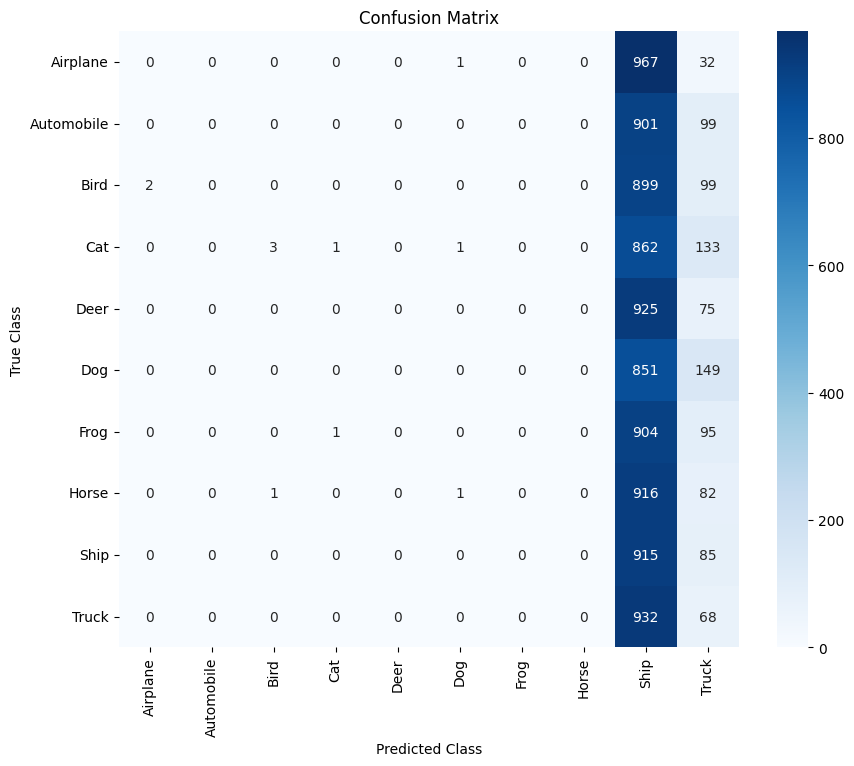

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# **Evaluate and Visualize Misclassified Samples**

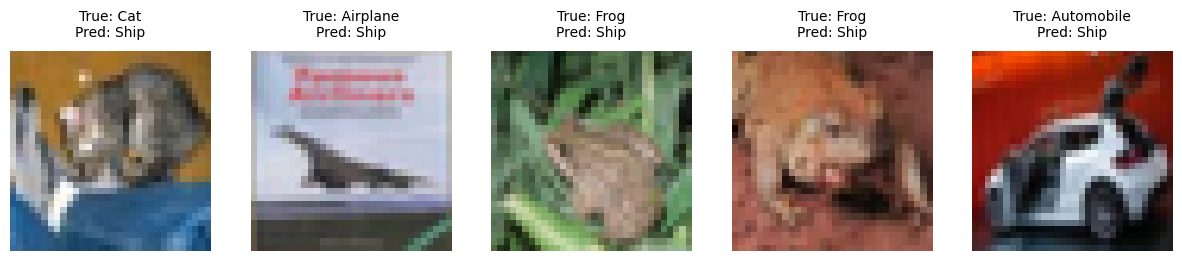

In [70]:
# Single-row visualization
plt.figure(figsize=(15, 5))  # Adjust figure size for single-row layout

for i, idx in enumerate(misclassified_indices[:num_misclassified]):
    plt.subplot(1, num_misclassified, i + 1)  # Single row, multiple columns
    plt.imshow(x_test[idx])
    plt.axis("off")  # Turn off axis lines and ticks

    # Add title above the image
    plt.title(
        f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}",
        fontsize=10,
        pad=10  # Add padding to avoid overlap with the image
    )

# Save the figure
plt.savefig('misclassified_samples_single_row.png', dpi=300, bbox_inches='tight')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.50      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.00      0.00      0.00      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.10      0.92      0.18      1000
       truck       0.07      0.07      0.07      1000

    accuracy                           0.10     10000
   macro avg       0.07      0.10      0.03     10000
weighted avg       0.07      0.10      0.03     10000



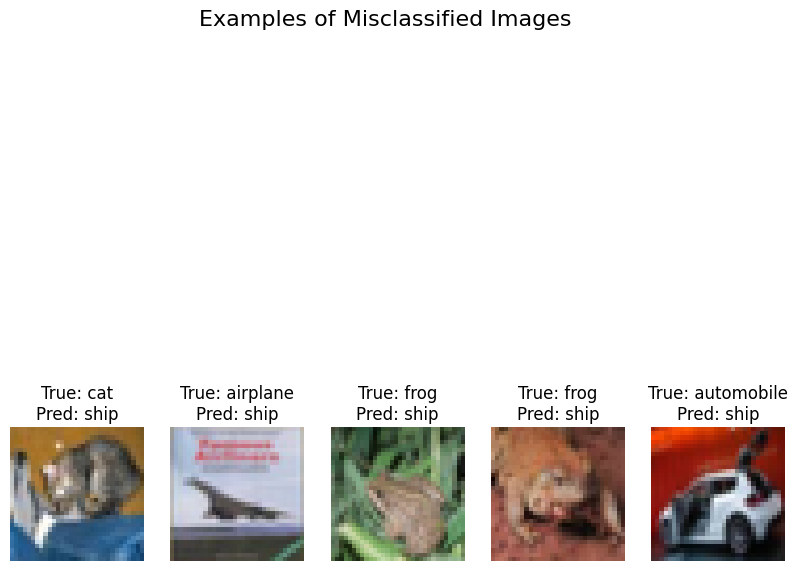

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report with zero_division fix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

# Find misclassified samples
misclassified_indices = np.where(y_pred != y_true)[0]

# Plot a few misclassified images
num_misclassified = 5
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:num_misclassified]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.suptitle("Examples of Misclassified Images", fontsize=16)
plt.show()
